## installing...

In [ ]:
!pip install giotto-tda

In [ ]:
!pip freeze

## importing...

In [3]:
from gtda.time_series import embedding, TakensEmbedding

In [4]:
import pandas as pd
import numpy as np


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
import plotly.express as px

## loading data...

- Температура в Нью-Йорке


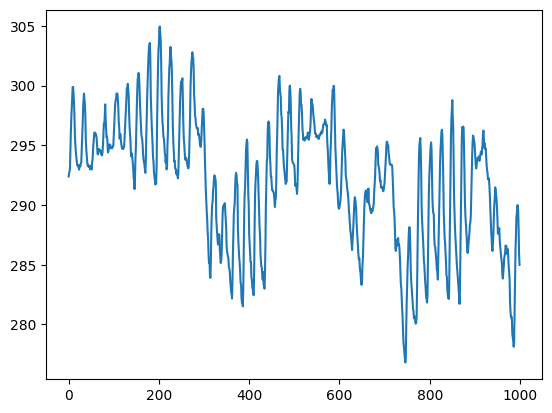

In [8]:
data_temp = pd.read_csv('temperature.csv')['New York'].dropna().values[-1000:]
plt.plot(data_temp)
plt.show()

## Для выполнения задания используем библиотеку giotto...

In [9]:
optimal_delay_temp, optimal_dimension_temp = embedding.takens_embedding_optimal_parameters(
    data_temp, 100, 10, stride=1
    )

In [11]:
data_temp.shape

(1000,)

In [12]:
print('optimal params:')
{
    'temperature':(optimal_delay_temp,optimal_dimension_temp)

}

optimal params:


{'temperature': (17, 5)}

### Трехмерный график фазового пространства для  для температуры




In [14]:
from sklearn.manifold import TSNE

In [15]:
ph_temp = TakensEmbedding(optimal_delay_temp, optimal_dimension_temp).fit_transform(data_temp.reshape(1, -1))[0]


In [16]:
tsne = TSNE(n_components=3, perplexity=30, n_iter=300)
ph_temp_3d = tsne.fit_transform(ph_temp)

In [17]:
cols=['x', 'y', 'z']
plot_3d = px.line_3d(pd.DataFrame(ph_temp_3d, columns=cols), x="x", y="y", z="z")
plot_3d.show()

## Кластеризуем...


In [18]:
from sklearn.cluster import AgglomerativeClustering

In [41]:
ac = AgglomerativeClustering(n_clusters=3, metric='euclidean')
ac.fit(ph_temp_3d)

AgglomerativeClustering(metric='euclidean', n_clusters=3)

In [42]:
cluster_ph_temp_3d = pd.concat([pd.DataFrame(ph_temp_3d, columns=['x', 'y', 'z']), pd.DataFrame(ac.labels_.reshape(-1, 1), columns=['cluster'])], axis=1)

In [43]:
cluster_ph_temp_3d

,x,y,z,cluster
0,-2.110204,1.783690,0.587944,1
1,-2.179596,1.844186,0.852097,1
2,-2.232581,1.902994,1.012834,1
3,-2.741741,2.279312,1.789839,1
4,-3.853975,2.692997,2.874334,1
...,...,...,...,...
927,5.240035,-0.593974,-5.321747,2
928,5.197498,-0.817402,-5.434271,2
929,5.120210,-1.165348,-5.661825,2
930,4.999692,-1.491239,-5.954067,2


In [44]:
cols=['x', 'y', 'z']
plot_3d = px.scatter_3d(cluster_ph_temp_3d, x="x", y="y", z="z",color='cluster')
plot_3d.show()

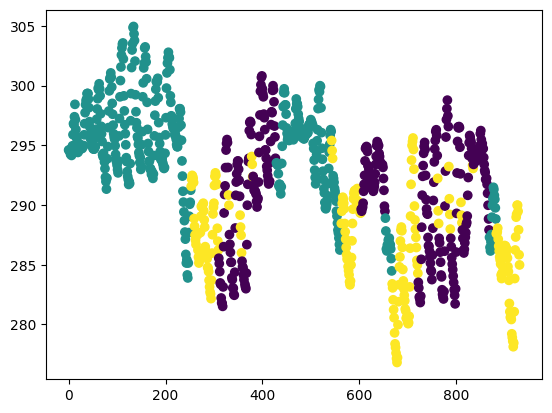

In [45]:
plt.scatter(x=cluster_ph_temp_3d.index, y=data_temp[68:],c=cluster_ph_temp_3d.cluster)
plt.show()

## Оцениваем...

In [50]:
from scipy.stats import entropy

In [51]:
probs = []
data_temp_=pd.Series(data_temp[68:])
for cluster in cluster_ph_temp_3d.cluster.unique():
    temp, _ = np.histogram(data_temp_[cluster_ph_temp_3d.cluster == cluster], density=True, bins=len(data_temp_))
    probs.append(entropy(temp, base=2))

In [56]:
probs,max(probs)

([7.830140030930379, 7.203629135594168, 7.485661991589461], 7.830140030930379)

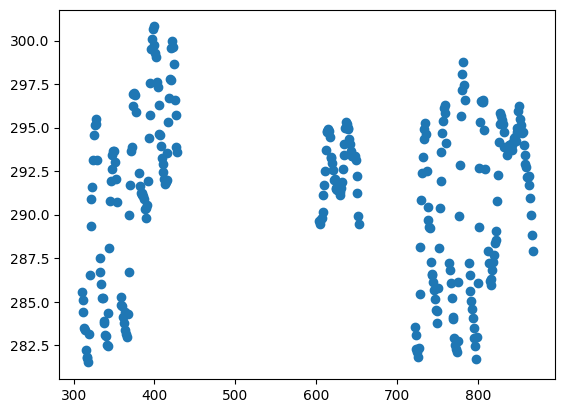

In [57]:
#максимальное значение у первого кластера
plt.scatter(x=cluster_ph_temp_3d[cluster_ph_temp_3d.cluster==0].index, y=data_temp_[cluster_ph_temp_3d.cluster==0])
plt.show()